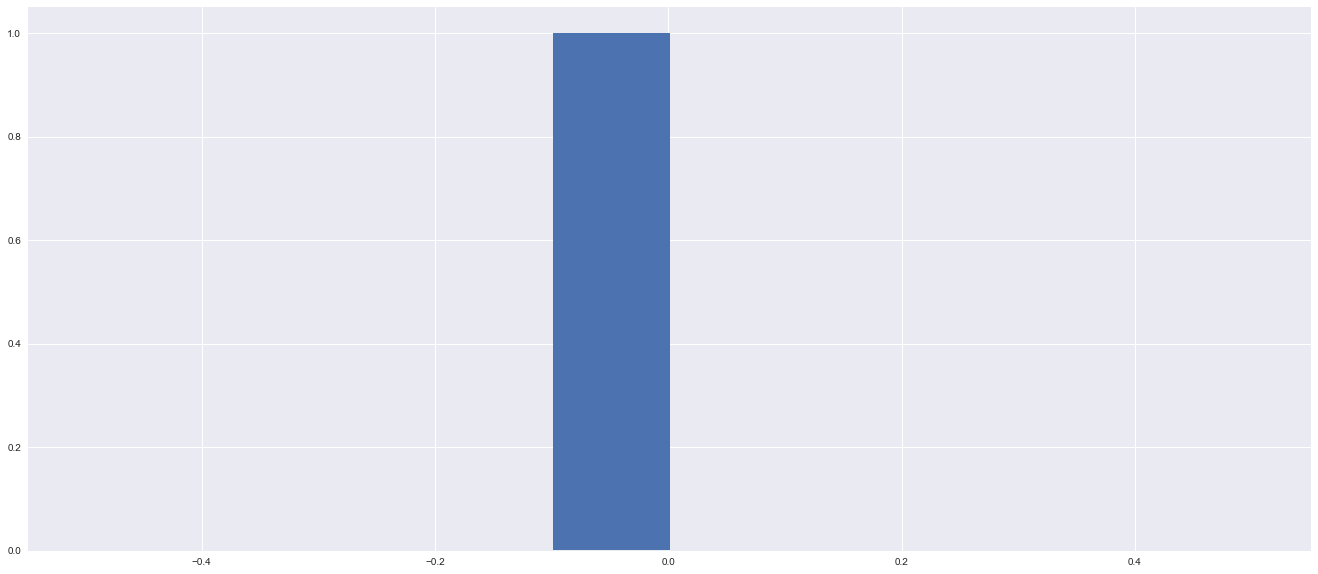

In [29]:
#Lower Partial Moment--: Avg Returns (threshold) - Deviations (deviations below average)

import numpy as np
import numpy.random as nrand
import matplotlib.pyplot as plt
import math

plt.style.use('seaborn')
plt.figure(figsize=(23,10))


def lpm(returns, threshold, order):
    # This method returns a lower partial moment of the returns
    # Create an array he same length as returns containing the minimum return threshold
    threshold_array = np.empty(len(returns))
    threshold_array.fill(threshold)
    # Calculate the difference between the threshold and the returns
    diff = threshold_array - returns
    # Set the minimum of each to 0
    diff = diff.clip(min=0)
    # Return the sum of the different to the power of order
    return np.sum(diff ** order) / len(returns)



plt.hist(x=mu,y=vol)
plt.show()

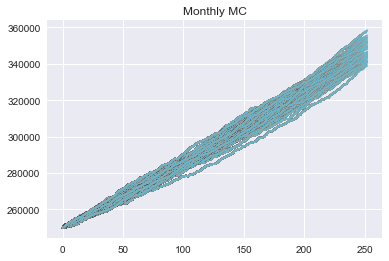

In [10]:
##Define Vars
S =   250000 #250000  #Most recent equity account value
T = 25 # number trading days
mu =  .001321 #Average daily return (Can also calc by actual / 365)
vol = .00095 

''' Weekly
mu = 4.185/52
stdev = 2.173/52 or /5?
daily_rets = np.random.noraml(mu/T(=52),vol/math.sqrt(T),T) + 1
'''

for i in range(48):
    #Create a list of daily returns using random normal distribution
    daily_returns = np.random.normal(mu,vol,T)+1
    
    #Set starting price and 
    price_list = [S]
    #create price series (eq curve value) by above random daily chg
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
        #Plot data from each run
        plt.plot(price_list)
        
        #result = []
        #result.append([price_list]-1)

plt.title('Monthly MC')     
plt.show()

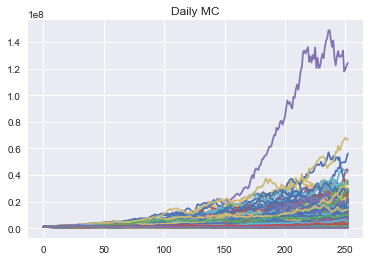

In [5]:
#Define vars
S = 1000000
T = 252
mu = 1.92246
vol = .86123  #Between .76 and .86

result = []
for i in range(1000):
    daily_returns = np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    result.append(price_list[-1]) #appending each runs end value --to calculate the mean return
        
    plt.plot(price_list)#This is key, KEEP THIS IN LOOP,votherwise it will plot one iteration/return path.
plt.title('Daily MC')
plt.show()

In [6]:
from scipy import stats
from statistics import stdev

print('Mean:',np.mean(result))
print('Mean Ret:',np.mean(result)/S*100)
print('Median:',np.median(result))
print('Median Ret:',np.median(result)/S*100)
print('Min:',np.min(result))
print('Min Ret:',np.min(result)/S*100)
print('Max:',np.max(result))
print('Max Ret:',np.max(result)/S*100)
#print('Mode:',stats.mode(result))
print('Stdev', stdev(result))
mc_mu = np.mean(result)
med = np.median(result)
mc_min = np.min(result)
mx = np.max(result)
std = stdev(result)

metrics = [mc_mu,med,mc_min,mx]
print('sharpe:',mu/vol)

print('5% Quantile',np.percentile(result,5))
print('5% Quantile %',np.percentile(result,5)/S*100)
print('95% Quantile',np.percentile(result,95))
print('95% Quantile %',np.percentile(result,95)/S*100)

Mean: 6734512.300422079
Mean Ret: 673.4512300422078
Median: 4445506.367918827
Median Ret: 444.5506367918827
Min: 244614.9040934288
Min Ret: 24.461490409342883
Max: 124229467.62385601
Max Ret: 12422.946762385602
Stdev 7583144.650850517
sharpe: 2.2322260023454827
5% Quantile 1048915.1631557844
5% Quantile % 104.89151631557843
95% Quantile 19647273.46573724
95% Quantile % 1964.727346573724


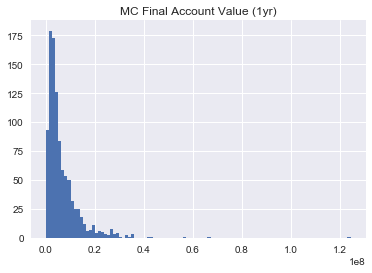

In [7]:
#Hist of ending equity values of our multiple simulations
plt.hist(result,bins=100)
plt.title('MC Final Account Value (1yr)')
plt.show()

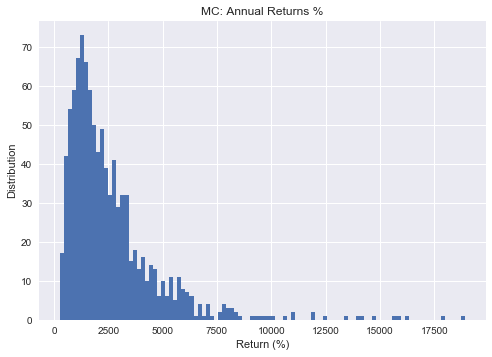

Mean return %: 2614.204013495909
Median return %: 2010.5843181142536
Min return %: 262.2187010497505
Max return %: 18928.602922401245
Stdev % 2224.962483972488


In [49]:
res = [i/S*100 for i in result]
plt.title('MC: Annual Returns %')
plt.xlabel('Return (%)')
plt.ylabel('Distribution')
plt.hist(res,bins=100)
plt.show()


print('Mean return %:',np.mean(res))
print('Median return %:',np.median(res))
print('Min return %:',np.min(res))
print('Max return %:',np.max(res))
#print('Mode:',stats.mode(result))
print('Stdev %', stdev(res))

In [1]:
#Sortino Ratio:
import pandas as pd

ret = pd.read_excel('/Users/zoakes/Desktop/Quant/Py_Review/Omni/Omni.xlsx') #THANK FUCKING GOD -- just drag drop into terminal !
rets = [.0196,0.0196,0.0136,0.0202,0.0248,0.0097,0.0286,0.0132,0.0358,0.0169,0.0258,0.0371,0.0207,0.0171,0.044,0.0307,0.023,0.0467,0.0221,0.0388,0.049,0.0564,0.0514,0.0553,0.0768,0.0638,0.0569,0.0513,0.0478,0.0305,0.0209,0.0347,0.0387,0.0314,0.0312,0.0189,0.0268,0.0251,0.0428]

#RETS = combined rets, ret = individual returns
ct = len(rets)

ann = 688.46/252

er = np.mean(rets)  #Expected return? Daily?
#returns = d (daily returns) -- use d from lpm calc

rfr = 0.0225 #for now--conf later

def sortino_ratio(er, returns, rf, order, target=0):
    return (er - rf) / math.sqrt(lpm(returns, target, order))


#sortino_ratio(er,rets,rfr,3.3,er)

sortino_1 = sortino_ratio(ann,rets,rfr,1,er)
sortino_2 = sortino_ratio(ann,rets,rfr,2,er)
sortino_3 = sortino_ratio(ann,rets,rfr,3,er)
sortinos = [sortino_1,sortino_2,sortino_3]
sortinos = [round(i,2) for i in sortinos]
import pandas as pd
import seaborn as sns


res = pd.DataFrame(data=sortinos,columns=['Sortino Ratio'])
res['Order'] = [1,2,3]
#res = res.set_index('Order')
print(res)

#sns.lineplot(data=res)
#g = sns.factorplot( data=res, 
#                       kind="count", color='steelblue')
#g.set_xticklabels(step=5)
ax = res.plot(kind='bar',x='Order',y='Sortino Ratio',figsize=(23,10),fontsize=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=15)

NameError: name 'np' is not defined

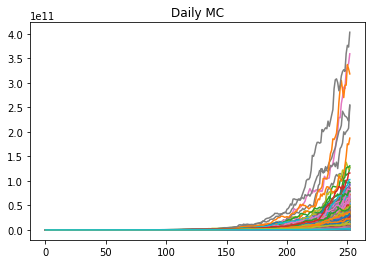

In [9]:
'''TRYING TO USE A NON-NORMAL DISTRIBUTION  -- GUMBEL IS BETTER, but want my own with kurt of 6'''
import numpy as np
import matplotlib.pyplot as plt
import math 

#Define vars
S = 1000000
T = 252
mu = 1.92246
vol = .86123  #Between .76 and .86
its = 1000

result = []
for i in range(its):
    #daily_returns = np.random.standard_cauchy(num_sets) #(mu/T,vol/math.sqrt(T),T)+1
    daily_returns = np.random.gumbel(mu/T,vol/np.sqrt(T),T)+1 #Fat tailed dist 
    
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    result.append(price_list[-1]) #appending each runs end value --to calculate the mean return
        
    plt.plot(price_list)#This is key, KEEP THIS IN LOOP,votherwise it will plot one iteration/return path.
    
plt.title('Daily MC')
plt.show()

(array(60.23267496), array(2.63069296e-05), array(-0.10186186), array(11.70127443))


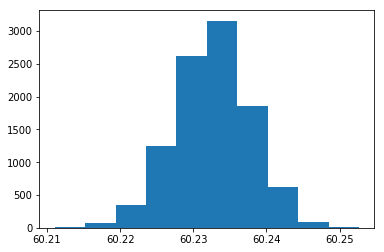

(array(60.23267496), array(2.63069296e-05), array(-0.10186186), array(11.70127443))


In [58]:
import scipy.stats

#Guess and test -- until skewness relatively normal, with Kurtosis of 7-12. 
#THIS represents historically the actual distrubtion of the SP500 -- NOT normal .
distribution = scipy.stats.gengamma(100, 200, loc=50, scale=10)  #SAVE weights ! 
print(distribution.stats('mvsk'))


#Using modified normal...
distribution = scipy.stats.norm(loc=100,scale=5)
sample = distribution.rvs(size=10000)
plt.hist(sample)
plt.show()
print(distribution.stats('mvsk'))  

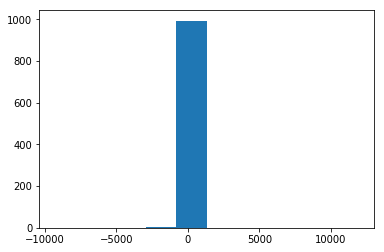

(array(nan), array(nan), array(nan), array(nan))

In [85]:
import statsmodels.sandbox.distributions.extras as extras

notnorm = extras.pdf_mvsk([1,60,0,100.5])
range = np.arange(0,360,.1)
#plt.plot(range,notnorm(range))
#plt.show()

'''^^wrong -- try cauchy '''

from scipy.stats import cauchy
gamma = 2
dist = cauchy(.2, 10)
sample = dist.rvs(size=1000)
plt.hist(sample)
plt.show()

dist.stats('mvsk')

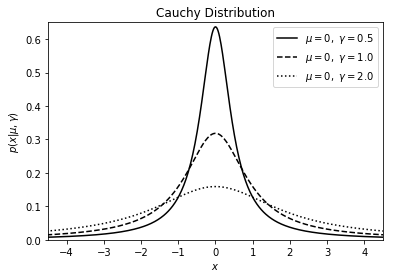

In [82]:
'''Show a cauchy dist'''
# Define the distribution parameters to be plotted
gamma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

for gamma, ls in zip(gamma_values, linestyles):
    dist = cauchy(mu, gamma)

    plt.plot(x, dist.pdf(x), ls=ls, color='black',
             label=r'$\mu=%i,\ \gamma=%.1f$' % (mu, gamma))
    
plt.xlim(-4.5, 4.5)
plt.ylim(0, 0.65)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\gamma)$')
plt.title('Cauchy Distribution')

plt.legend()
plt.show()

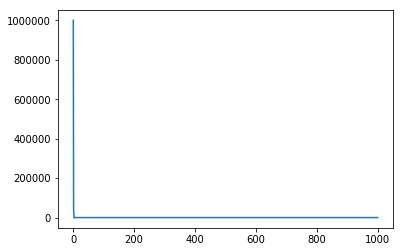

In [99]:
'''attemtping MC w/ Cauchy -- not working '''

S = 1000000
T = 252
mu = 1.92246
vol = .86123  #Between .76 and .86
its = 1000

result = []
    #for i in range(1000):
    #daily_returns = np.random.standard_cauchy(num_sets) #(mu/T,vol/math.sqrt(T),T)+1
    #daily_returns = np.random.gumbel(mu/T,vol/np.sqrt(T),T)+1 #Fat tailed dist 
dist = cauchy(mu/T,5/np.sqrt(T))
    #dist = cauchy(.2, 10)
daily_returns = dist.rvs(size=1000)
    
price_list = [S]
    
for x in daily_returns:
    price_list.append(price_list[-1]*x)
result.append(price_list[-1]) #appending each runs end value --to calculate the mean return
        
plt.plot(price_list)#This is key, KEEP THIS IN LOOP,votherwise it will plot one iteration/return path.
    

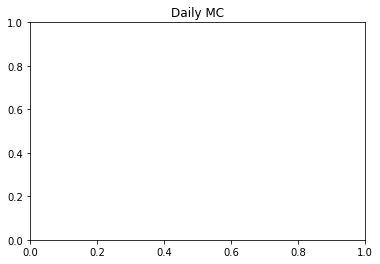

8.91375

In [109]:
plt.title('Daily MC')
plt.show()

'''Averaging Synthesis -- unrelated'''

dbls = [6.5, 7.79, 7.7, 18.11, 6.94, 5.39, 10.74,8.14]
#mu = [sum(i) for i in dbls]
sum = 0
for i in dbls:
    sum += i
sum/len(dbls)